#**Import Library dan Resource yang akan digunakan**

**Core Library**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Library untuk Splitting Data**

In [2]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [3]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [40]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

#**Inisiasi Variabel untuk menyimpan Dataframe**

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/sagitasantia/Checkpoint/main/Data%20Cleaned.csv')

In [6]:
df.head()

,Unnamed: 0,Global Speakers,Size,Status,Global Speakers Category
0,0,4.980000e+04,0,0,0
1,1,3.113691e+07,1,0,1
2,2,3.113691e+07,1,1,1
3,3,3.500000e+06,0,2,0
4,4,3.500000e+06,0,0,0


Penerapan clustering pada dataset mengenai ragam bahasa di Kota New York bisa menjadi instrumen yang efektif untuk menggali pola-pola unik dalam penggunaan bahasa oleh penduduk kota. Dengan menggunakan teknik ini, saya dapat menemukan kelompok-kelompok wilayah dengan jumlah pembicara global yang mungkin memiliki kesamaan dalam pola penggunaan bahasa. Selain itu, clustering juga membantu saya memahami lebih baik bagaimana komunitas-komunitas berbeda berinteraksi dan berkomunikasi di dalam kota tersebut, mengungkap pola dan dinamika yang mungkin tidak terlihat secara langsung.

#**Modelling Associate**

###**Pre-Processing**

#####**Adjusment**

In [8]:
x_final = df.drop("Unnamed: 0", axis=1)

menghapus kolom yang bernama "Unnamed: 0" dari data frame df. Kolom tersebut mungkin merupakan kolom yang tidak memiliki label atau nama yang jelas, atau mungkin merupakan indeks yang tidak dibutuhkan dalam analisis data lebih lanjut. Dengan menghapus kolom ini, kita dapat membersihkan data frame dan fokus pada kolom-kolom yang relevan untuk analisis yang akan dilakukan.

#####**Normalisasi Data**

In [9]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

 menggunakan metode yang disebut "MinMaxScaler" untuk mengubah data yang ada dalam array x_final ke dalam rentang yang baru. Rentang ini akan berada antara 0 dan 1. Proses ini dilakukan agar data-data yang memiliki skala yang berbeda-beda bisa dibandingkan dan dianalisis dengan lebih baik.

#####**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

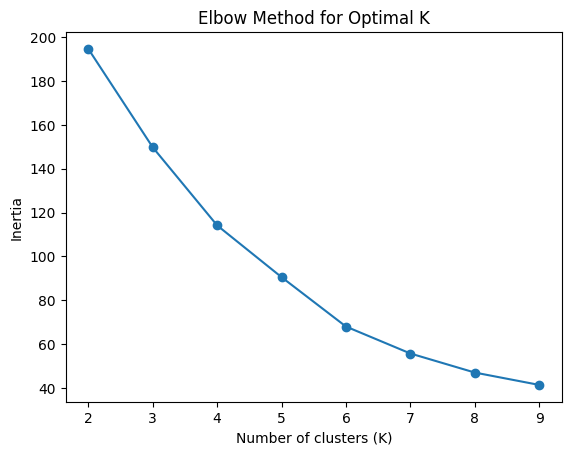

In [10]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Pada grafik output, sumbu x menunjukkan jumlah cluster (K), sedangkan sumbu y menunjukkan nilai inertia. Inertia merupakan ukuran seberapa jauh titik data dalam suatu cluster berada dari pusat kluster tersebut. Semakin kecil nilai inertia, semakin kompak kluster tersebut. Tujuan dari analisis ini adalah untuk menemukan titik di mana penurunan nilai inertia mulai melambat secara signifikan, menunjukkan bahwa penambahan cluster tidak memberikan peningkatan yang signifikan dalam pengelompokan data. Titik ini biasanya disebut "elbow point" dan digunakan sebagai indikasi jumlah cluster optimal yang akan digunakan dalam analisis lebih lanjut.









###**Build Model**

#####**K-Means**

In [11]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

 Menggunakan algoritma KMeans untuk menganalisis data. Dengan mengatur jumlah cluster menjadi 4, kita meminta algoritma ini untuk mengelompokkan data ke dalam 4 kelompok berbeda berdasarkan kesamaan karakteristiknya. Kemudian, kita melatih algoritma ini menggunakan data yang telah dinormalisasi

#####**Hierarchical Clustering**

In [13]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

digunakan untuk mengelompokkan data menjadi empat kelompok menggunakan metode clustering yang disebut Agglomerative Clustering. Metode ini menggunakan pengukuran jarak euclidean antara titik data untuk menentukan seberapa mirip atau berbedanya data. Kemudian, itu menggunakan pendekatan yang disebut "linkage ward" untuk menggabungkan kelompok-kelompok yang serupa secara bertahap.

###**Begins and Compare Clusters**

In [14]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [15]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

menciptakan beberapa dataframe baru dan menggabungkannya menjadi satu dataframe besar yang disebut combined_data_assoc. DataFrame pertama, x_final, direset indeksnya untuk memastikan urutan data yang konsisten. DataFrame kedua dan ketiga, yaitu kmeans_col dan hierarchy_col, dibuat untuk menyimpan hasil clustering dari metode k-means dan hierarki. Setelah itu, ketiga dataframe tersebut digabungkan secara horizontal, sehingga kita memiliki dataframe tunggal yang berisi semua data asli dan hasil clustering dari kedua metode.

In [16]:
combined_data_assoc.head()

,Global Speakers,Size,Status,Global Speakers Category,kmeans_cluster,hierarchy_cluster
0,4.980000e+04,0,0,0,3,1
1,3.113691e+07,1,0,1,1,0
2,3.113691e+07,1,1,1,1,0
3,3.500000e+06,0,2,0,3,1
4,3.500000e+06,0,0,0,3,1


Data yang ditampilkan adalah hasil dari penggabungan beberapa informasi. Kolom pertama, "Global Speakers," mengindikasikan jumlah pembicara global dalam suatu konteks tertentu. Kemudian, kolom "Size" dan "Status" memberikan informasi tambahan tentang ukuran dan status terkait. Selanjutnya, "Global Speakers Category" mengklasifikasikan jumlah pembicara global ke dalam kategori-kategori tertentu. Dua kolom terakhir, "kmeans_cluster" dan "hierarchy_cluster," menunjukkan hasil pengelompokan data menggunakan metode k-means dan hierarki masing-masing. Dengan memperhatikan nilai-nilai dalam setiap kolom, dapat dilihat bagaimana data tersebut terkelompokkan dan hubungannya dengan variabel lainnya.

# **Identifikasi Klaster**

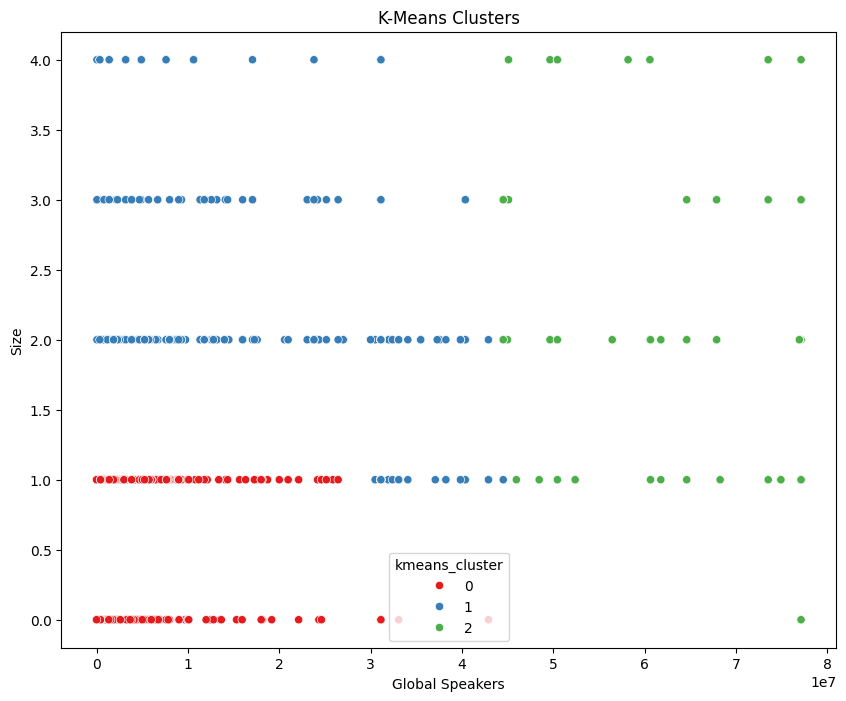

In [39]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=combined_data_assoc, x='Global Speakers', y='Size', hue='kmeans_cluster', palette='Set1', legend='full')
plt.title('K-Means Clusters')
plt.show()

Gambar di atas merupakan sebuah grafik yang menampilkan sebaran data dari dua variabel yaitu 'Global Speakers' dan 'Size'. Setiap titik pada grafik akan mewakili sebuah entitas dalam dataset. Warna setiap titik akan menunjukkan klaster yang dihasilkan oleh algoritma K-Means. Tujuannya adalah untuk membantu pemahaman pola atau hubungan antara 'Global Speakers' dan 'Size', serta bagaimana algoritma K-Means mengelompokkan data berdasarkan kedua variabel tersebut.